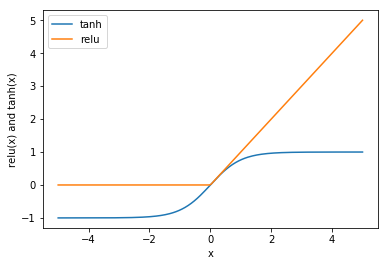

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#生成一个等差数列
line=np.linspace(-5,5,200)
#画出非线性矫正的图形表示
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')

#设置图注位置
plt.legend(loc='best')
#设置横轴纵轴标题
plt.xlabel('x')
plt.ylabel('relu(x) and tanh(x)')
plt.show()

In [3]:
#导入MLP神经网络
from sklearn.neural_network import MLPClassifier
#导入红酒数据集
from sklearn.datasets import load_wine
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
wine=load_wine()
X=wine.data[:,:2]
y=wine.target
#下面我们拆分数据
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
#接下来定义分类器
mlp=MLPClassifier(solver='lbfgs')
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

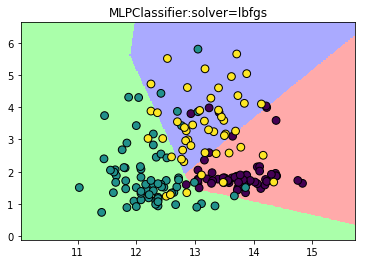

In [6]:
#导入画图工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#使用不同色块表示不同分类
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
Z=mlp.predict(np.c_[xx.ravel(),yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#用散点样本表示出来
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('MLPClassifier:solver=lbfgs')
plt.show()

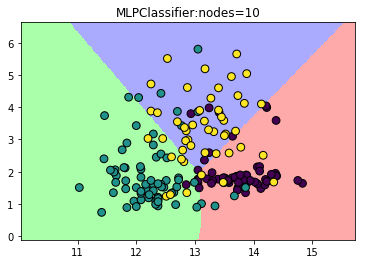

In [9]:
#设定隐藏层中的节点数为10
mlp_20=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10])
mlp_20.fit(X_train,y_train)
Z1=mlp_20.predict(np.c_[xx.ravel(),yy.ravel()])

Z1=Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z1,cmap=cmap_light)
#使用散点图画出X
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('MLPClassifier:nodes=10')
plt.show()

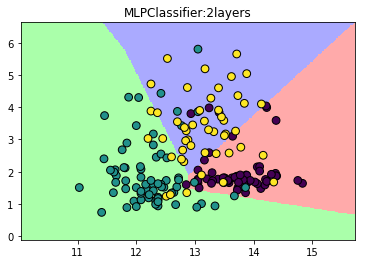

In [15]:
#设置神经网络有两个节点数为10的隐藏层
mlp_2L=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10])
mlp_2L.fit(X_train,y_train)
Z1=mlp_2L.predict(np.c_[xx.ravel(),yy.ravel()])
#用不同色彩区分分类
Z1=Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z1,cmap=cmap_light)
#使用散点图画出X
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('MLPClassifier:2layers')
plt.show()

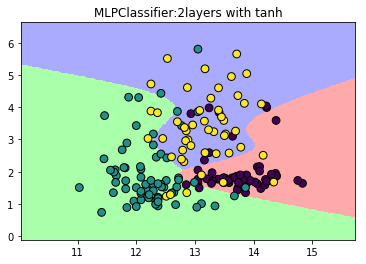

In [17]:
#设置激活函数tanh
mlp_tanh=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],activation='tanh')
mlp_tanh.fit(X_train,y_train)
#重新画图
Z2=mlp_tanh.predict(np.c_[xx.ravel(),yy.ravel()])
Z2=Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z2,cmap=cmap_light)
#散点图画出X
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('MLPClassifier:2layers with tanh')
plt.show()

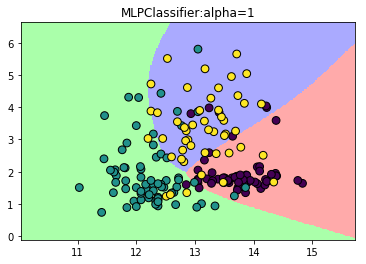

In [18]:
#修改模型的alpha参数
mlp_alpha=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],activation='tanh',alpha=1)
mlp_alpha.fit(X_train,y_train)
Z3=mlp_alpha.predict(np.c_[xx.ravel(),yy.ravel()])
Z3=Z3.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z3,cmap=cmap_light)
#散点图画出X
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',s=60)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('MLPClassifier:alpha=1')
plt.show()

#神经网络示例-手写识别

In [21]:
#导入数据集获取工具
from sklearn.datasets import fetch_mldata
#加载MNIST手写数字数据集
mnist=fetch_mldata('MNIST original')
mnist

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [22]:
#打印样本数量和样本特征数量
print('样本数量：{},样本特征数：{}'.format(mnist.data.shape[0],mnist.data.shape[1]))

样本数量：70000,样本特征数：784


In [24]:
#建立训练数据集和测试数据集
X=mnist.data/255.#使得全部数值就会在0到1之间，因为样本特征是从0-255的像素灰度值
y=mnist.target
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=5000,test_size=1000,random_state=62)

In [26]:
#设置神经网络有两个100个节点的隐藏层
mlp_hw=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,100],activation='relu',alpha=1e-5,random_state=62)

#使用数据训练神经网络模型
mlp_hw.fit(X_train,y_train)
#打印模型得分
print('测试数据集得分：{:.2f}%'.format(mlp_hw.score(X_test,y_test)*100))

测试数据集得分：93.60%


In [35]:
#导入图像处理工具
from PIL import Image
image=Image.open('4.png').convert('F')
#调整图像大小
image=image.resize((28,28))
arr=[]
#将图像中的像素作为预测数据点的特征
for i in range(28):
    for j in range(28):
        pixel=1.0-float(image.getpixel((j,i)))/255.
        arr.append(pixel)
#由于只有一个样本，所以需要进行reshape操作
arr1=np.array(arr).reshape(1,-1)
#进行图像识别
print('图片中的数字是：{:.0f}'.format(mlp_hw.predict(arr1)[0]))

图片中的数字是：8
